# **Data Mining & Warehousing Project - Section 4 (Group 2)**

**Team Member:**
*   Fatima Alhelal
*   Doja Alnemer
*   Refan Alanazi
*   Deemah Albabtain
*   Raneem Amasrahy
*   Huda Bazron

 **Project Tasks:**
1.   Use Python Packages to Analyze the Data
2.   Statistical Evaluation of the Dataset
3.   Data Preprocessing
4.   Outlier Detection and Handling
5.   Model Implementation
6.   Model Performance Comparison

 **Datasets:**

*   [Indian Liver Patient Records](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records)








**Import Libraries:**

This section includes importing all the necessary Python libraries needed for data loading, analysis, preprocessing, and modeling.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

**Task 1. Data Analysis Using Python Packages**

This task focuses on using Python libraries such as pandas and numpy to explore the dataset and examine the performance of different models.

In [10]:
# to load the dataset
data = pd.read_csv("indian_liver_patient.csv")

# to display the first few rows
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
# to display dataset information
print("Dataset Info:\n")
data.info()

# to display summary statistics
print("\nSummary Statistics:\n")
data.describe()

# to check for missing values
print("\nMissing Values:\n")
data.isnull().sum()

# to check dataset shape
print("\nDataset Shape:", data.shape)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB

Summary Statistics:


Missing Values:


Dataset Shape: (583, 11)


In [20]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

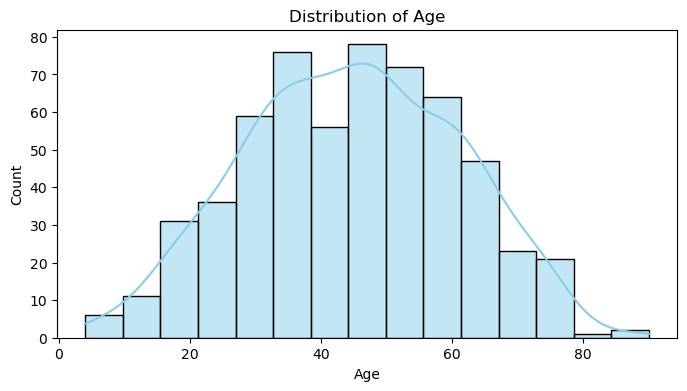

/var/folders/m5/3dnj1_1j1jndq3vv2x_7xzl80000gn/T/ipykernel_25275/3774532224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


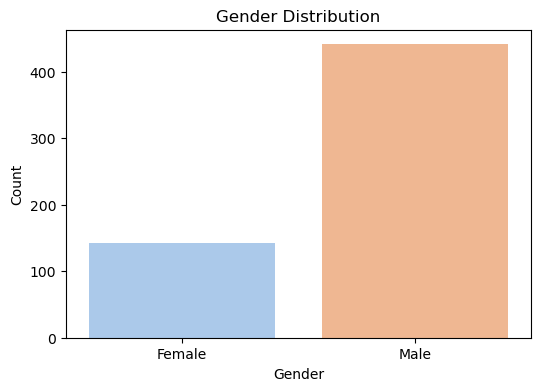

In [23]:
# Histogram for Age
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Countplot for the Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [24]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [25]:
# Drop rows with missing values for model training
model_data = data.dropna()

# Check the new shape after dropping missing values
model_data.shape

(579, 11)

In [26]:
# Define features (X) and target (y)
X = model_data.drop('Dataset', axis=1)
y = model_data['Dataset']

# Display shapes of X and y
X.shape, y.shape

((579, 10), (579,))

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Show the shapes of the new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 10), (174, 10), (405,), (174,))

In [29]:
# Logistic Regression Model

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
log_accuracy

0.6609195402298851

In [30]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.6839080459770115

**Task 2. Statistical Evaluation**

This task provides a statistical overview of the dataset to better understand the distribution and characteristics of the variables.

In [31]:
#Cleaning data from null values:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())
print("NULL COUNTS AFTER CLEANING NULL VALUES:")
print("-" * 55)
print(data.isnull().sum())
print("\n\n")

NULL COUNTS AFTER CLEANING NULL VALUES:
-------------------------------------------------------
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64





In [33]:
#Apply describtive statistics
print("DESCRIBTIVE STATISTICS")
print("-"*55)
desc_stats = data.describe()
print(desc_stats)
print("\n\n")

DESCRIBTIVE STATISTICS
-------------------------------------------------------
              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.756432         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     45.000000    1.000000         1.000000          0.300000   
75%     58.000000    1.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            583.000000                583.000000   
mean             290.576329                 80.713551   
std              242.937989                182.620356   
min               63.000000                 10.000000   
25%              175.50

In [ ]:
#Central Tendancy and dispersion statitics
print("CENTRAL TENDENCY & DISPERSION STATISTICS")
print("=" * 55)

for col in data.select_dtypes(include=[np.number]).columns.drop(['Dataset', 'Gender']):
    print("\n" + col + ":")
    print("  Mean:     " + str(round(data[col].mean(), 2)))
    print("  Median:   " + str(round(data[col].median(), 2)))
    print("  Mode:     " + str(round(data[col].mode()[0], 2)))
    print("  Std Dev:  " + str(round(data[col].std(), 2)))
    print("  Variance: " + str(round(data[col].var(), 2)))
    print("  Range:    " + str(round(data[col].max() - data[col].min(), 2)))

In [ ]:
#Variabilty analysis 
print("VARIABILITY ANALYSIS      (ignoring Gender and Dataset)")
print("=" * 55)
print("\nCoefficient of Variation (CV = std/mean * 100%):")
cv = (data.std() / data.mean() * 100).sort_values(ascending=False)
print(cv)

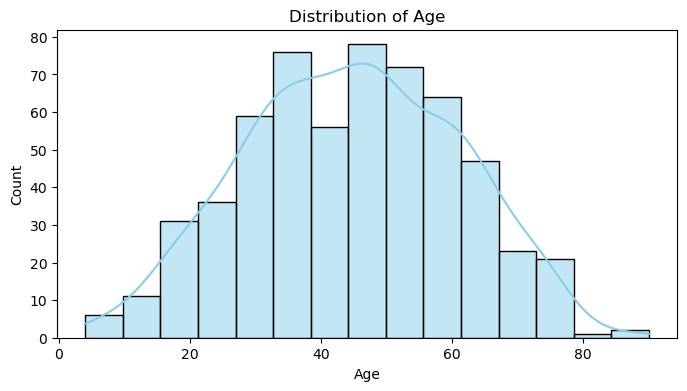

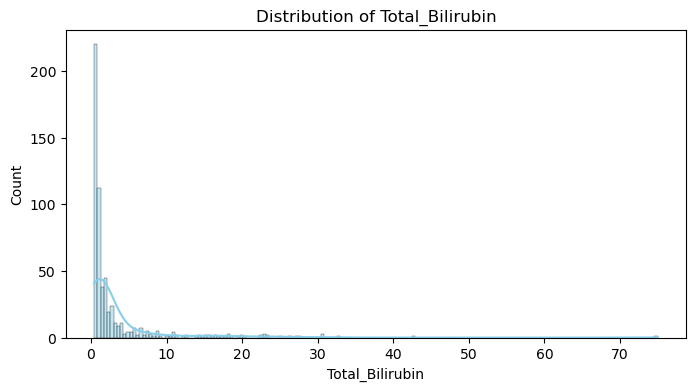

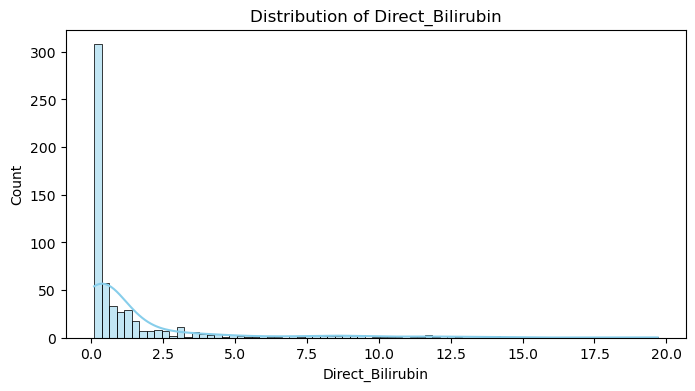

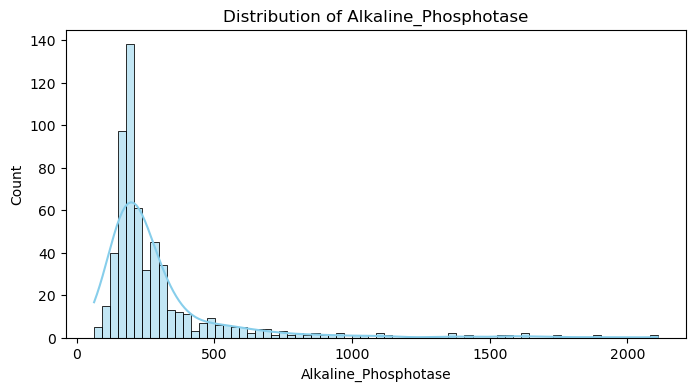

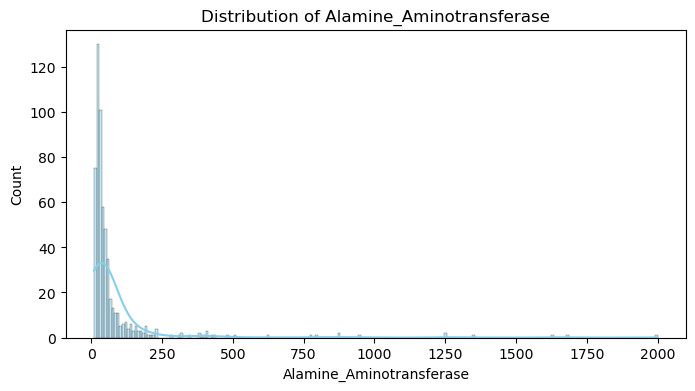

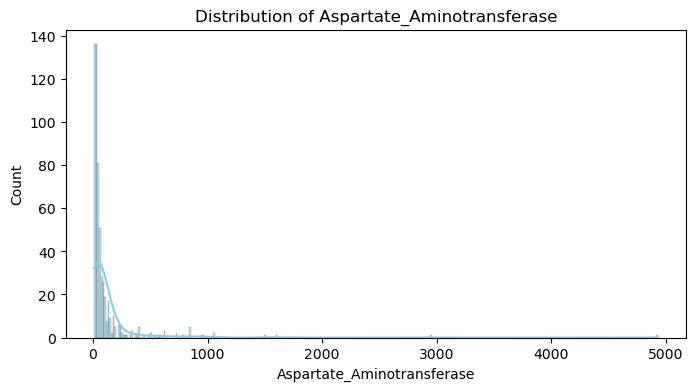

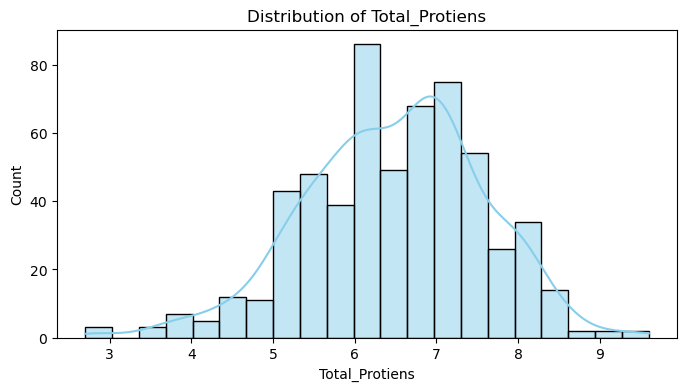

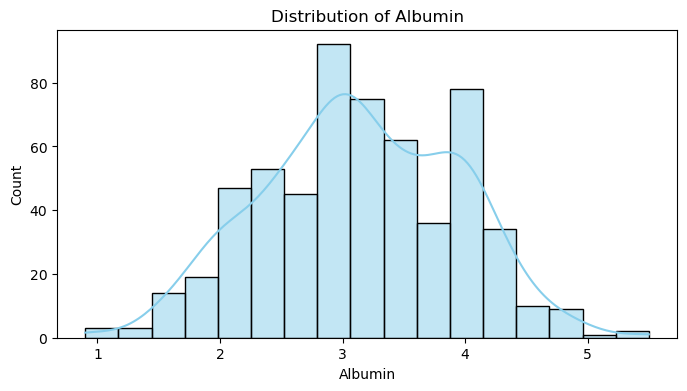

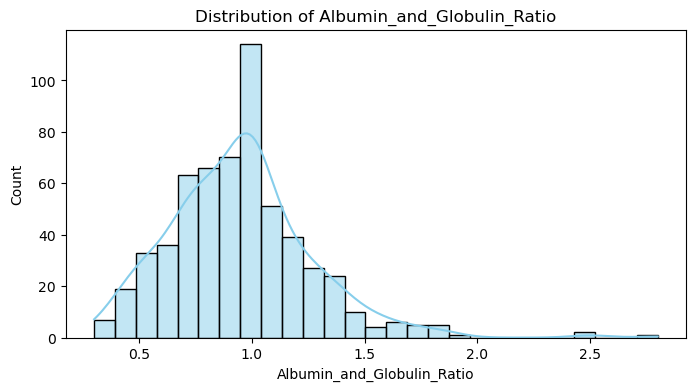

In [34]:
#VISULIZE DATA/ histograms
#---------------
def make_histogram(att):
    plt.figure(figsize=(8,4))
    sns.histplot(data[att], kde=True, color='skyblue')
    plt.title("Distribution of " + att)
    plt.xlabel(att)
    plt.ylabel("Count")
    plt.show()
    return plt.show()

make_histogram("Age")
print("\n")
make_histogram("Total_Bilirubin")
print("\n")
make_histogram("Direct_Bilirubin")
print("\n")
make_histogram("Alkaline_Phosphotase")
print("\n")
make_histogram("Alamine_Aminotransferase")
print("\n")
make_histogram("Aspartate_Aminotransferase")
print("\n")
make_histogram("Total_Protiens")
print("\n")
make_histogram("Albumin")
print("\n")
make_histogram("Albumin_and_Globulin_Ratio")

In [ ]:
#Apply skewness analysis
skewness = data.skew()
print("SKEWNESS VALUES:")
print("-"*55)
print(skewness)
print("\n\n")

print("INTERPRETATION:")
print("-"*55)
for col, skew_val in skewness.items():
    if abs(skew_val) < 0.5:
        print("Approximately symmetric")
    elif abs(skew_val) < 1:
        print("Moderately skewed")
    else:
        print("Highly skewed")

In [ ]:
#VISULIZE DATA/ Box plots
def make_boxplot(att):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[att], color="skyblue")
    plt.title("Box Plot of " + att, fontweight="bold")
    plt.ylabel(att)
    return plt.show()

make_boxplot("Age")
print("\n")
make_boxplot("Total_Bilirubin")
print("\n")
make_boxplot("Direct_Bilirubin")
print("\n")
make_boxplot("Alkaline_Phosphotase")
print("\n")
make_boxplot("Alamine_Aminotransferase")
print("\n")
make_boxplot("Aspartate_Aminotransferase")
print("\n")
make_boxplot("Total_Protiens")
print("\n")
make_boxplot("Albumin")
print("\n")
make_boxplot("Albumin_and_Globulin_Ratio")

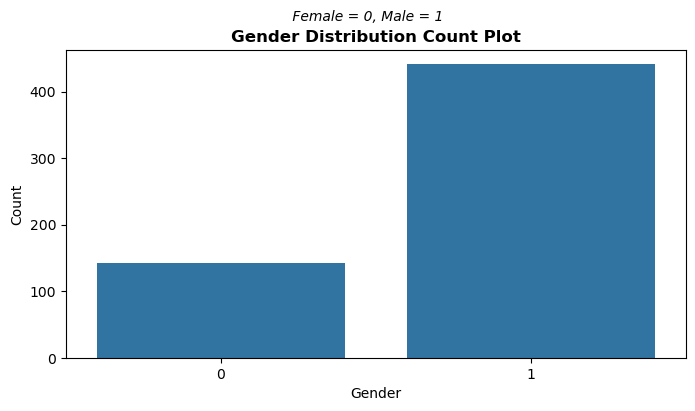

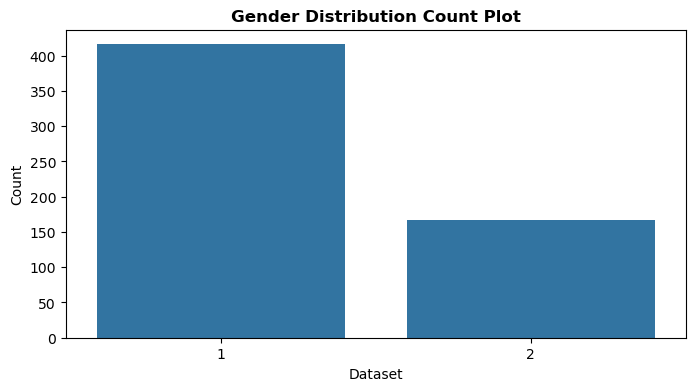

In [35]:
#VISUALIZE DATA / Count plots
#GENDER
plt.figure(figsize=(8, 4))
plt.title('Gender Distribution Count Plot', fontweight='bold')
sns.countplot(x='Gender', data=data, hue='Gender', palette=['pink', 'lightblue'])  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.suptitle(' Female = 0, Male = 1', fontsize=10, style='italic')
plt.show()
print("\n")
#Dataset
plt.figure(figsize=(8, 4))
plt.title('Data set number Count Plot', fontweight='bold')
sns.countplot(x='Dataset', data=data, hue='Dataset', palette=['coral', 'skyblue'])  
plt.xlabel('Dataset')
plt.ylabel('Number of occurances')
plt.show()

In [ ]:
print("RANGE AND SPREAD ANALYSIS")
print("=" * 55)
ranges = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Range': data.max() - data.min(),
    'IQR': data.quantile(0.75) - data.quantile(0.25)
})
print(ranges)

In [ ]:
#VISULIZE DATA/ Scatter plots
# 1) Total_Bilirubin vs Direct_Bilirubin
plt.figure(figsize=(6, 4))
plt.scatter(data['Total_Bilirubin'], data['Direct_Bilirubin'], alpha=0.6, color='blue')
plt.title('Total Bilirubin vs Direct Bilirubin', fontweight='bold')
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
plt.grid(True, alpha=0.3)
plt.show()
print("\n")
# 2) Age vs. Total_Bilirubin (colored by Dataset)
plt.figure(figsize=(6, 4))
colors = ['coral', 'skyblue']
for i, dataset in enumerate([1, 2]):
    subset = data[data['Dataset'] == dataset]
    plt.scatter(subset['Age'], subset['Total_Bilirubin'], 
                alpha=0.6, color=colors[i], 
                label='Liver Patient' if dataset == 1 else 'Non-Liver Patient')
plt.title('Age vs Total Bilirubin', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print("\n")
# 3) Albumin vs. Albumin_and_Globulin_Ratio
plt.figure(figsize=(6, 4))
plt.scatter(data['Albumin'], data['Albumin_and_Globulin_Ratio'], alpha=0.6, color='purple')
plt.title('Albumin vs Albumin and Globulin Ratio', fontweight='bold')
plt.xlabel('Albumin')
plt.ylabel('Albumin and Globulin Ratio')
plt.grid(True, alpha=0.3)
plt.show()
print("\n")
# 4) (Alamine_Aminotransferase) vs (Aspartate_Aminotransferase)
plt.figure(figsize=(6, 4))
plt.scatter(data['Alamine_Aminotransferase'], data['Aspartate_Aminotransferase'], 
            alpha=0.6, color='plum')
plt.title('Alamine_Aminotransferase vs Aspartate_Aminotransferase', fontweight='bold')
plt.xlabel('(Alamine Aminotransferase)')
plt.ylabel('(Aspartate Aminotransferase)')
plt.grid(True, alpha=0.3)
plt.show()
print("\n")
# 5) Total_Protiens vs Albumin
plt.figure(figsize=(6, 4))
plt.scatter(data['Total_Protiens'], data['Albumin'], alpha=0.6, color='pink')
plt.title('Total Proteins vs Albumin', fontweight='bold')
plt.xlabel('Total Proteins')
plt.ylabel('Albumin')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Correlatiion: Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

**Task 3. Data Preprocessing**

This task prepares the dataset for modeling by cleaning the data, handling missing values, and applying any needed transformations.

In [37]:
# ----- Task 3: Data Preprocessing -----
# Step 1: Make a copy of the cleaned data and check duplicates / missing values

preprocessed_data = data.copy()  # work on a copy so we don't change previous tasks

print("Shape BEFORE removing duplicates:", preprocessed_data.shape)
print("Number of duplicate rows:", preprocessed_data.duplicated().sum())

# Remove duplicate rows if there are any
preprocessed_data = preprocessed_data.drop_duplicates()

print("\nShape AFTER removing duplicates:", preprocessed_data.shape)

print("\nMissing values in each column (after previous cleaning):")
print(preprocessed_data.isnull().sum())


Shape BEFORE removing duplicates: (583, 11)
Number of duplicate rows: 13

Shape AFTER removing duplicates: (570, 11)

Missing values in each column (after previous cleaning):
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [38]:
# Step 2: Create new target column and remove old Dataset column

# 1. Create the new binary target column (1 = disease, 0 = no disease)
preprocessed_data['Liver_Disease'] = preprocessed_data['Dataset'].replace({1: 1, 2: 0}).astype('category')

# 2. Remove the old Dataset column completely
preprocessed_data = preprocessed_data.drop('Dataset', axis=1)

# 3. Change Gender column into category type
preprocessed_data['Gender'] = preprocessed_data['Gender'].astype('category')



**Task 4. Outlier Analysis**

This task identifies unusual or extreme values in the dataset and describes how they are evaluated and addressed.

In [39]:
#---Task 4 ---
#to identify numerical columns
num_cols = preprocessed_data.select_dtypes(include=['float64','int64']).columns
num_cols = num_cols.drop(['Age'])
num_cols

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [40]:
#using IQR to detect outliers
Q1 = preprocessed_data[num_cols].quantile(0.25)
Q3 = preprocessed_data[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
  #number of rows containig outliers
outlier_mask = (preprocessed_data[num_cols] < lower ) | (preprocessed_data[num_cols] > upper )
outliers = preprocessed_data[outlier_mask.any(axis = 1)]
len(outliers)

183

In [41]:
#number of outliers per column
outlier_count = outlier_mask.sum()
outlier_count

Total_Bilirubin               83
Direct_Bilirubin              80
Alkaline_Phosphotase          69
Alamine_Aminotransferase      72
Aspartate_Aminotransferase    66
Total_Protiens                 8
Albumin                        0
Albumin_and_Globulin_Ratio    10
dtype: int64

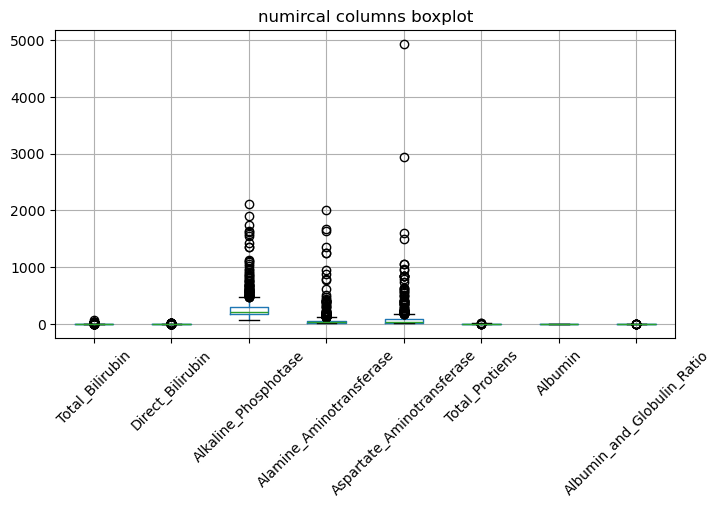

In [42]:
plt.figure(figsize = (8,4))
preprocessed_data[num_cols].boxplot()
plt.title("numircal columns boxplot")
plt.xticks(rotation=45)
plt.show()

In [43]:
#handeling the outliers using winsorizing(capping)
data_capped = preprocessed_data.copy()

for col in num_cols:
    lower_bound = Q1[col] - 1.5*IQR[col]
    upper_bound = Q3[col] + 1.5*IQR[col]

    data_capped[col] = preprocessed_data[col].clip(lower_bound, upper_bound)

#outliers count after the winsorizing
outlier_mask_after = (
    (data_capped[num_cols] < (Q1 - 1.5 * IQR)) | (data_capped[num_cols] > (Q3 + 1.5 * IQR) ))
outlier_mask_after.sum()

Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

**Task 5. Model Implementation**



**Logistic Regression**

This part applies logistic regression to the dataset and explores ways to improve its performance.

In [44]:
# X = features, y = target
X = data_capped.drop('Liver_Disease', axis=1)
y = data_capped['Liver_Disease']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,   # for reproducible results
    stratify=y         # keeps class balance in split
)

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [45]:
# Base Logistic Regression model (no tuning)
log_base = LogisticRegression(max_iter=1000)

# Train the model on scaled data
log_base.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_log_base = log_base.predict(X_test_scaled)

# Evaluation metrics
print(f"Base Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_base) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_base))
print("Classification Report:\n", classification_report(y_test, y_pred_log_base))


Base Logistic Regression Accuracy: 71.93%
Confusion Matrix:
 [[ 9 24]
 [ 8 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.27      0.36        33
           1       0.75      0.90      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.59      0.59       114
weighted avg       0.69      0.72      0.69       114



In [46]:
# Hyperparameter tuning for Logistic Regression
C_values = [0.01, 0.1, 1, 10]
class_weights = [None, 'balanced']

best_acc_log = 0
best_params_log = None

for c in C_values:
    for cw in class_weights:
        model = LogisticRegression(
            max_iter=1000,
            C=c,
            class_weight=cw
        )

        # Train
        model.fit(X_train_scaled, y_train)

        # Predict
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred) * 100

        print(f"C={c}, class_weight={cw}, accuracy={acc:.2f}%")

        # Track best score
        if acc > best_acc_log:
            best_acc_log = acc
            best_params_log = (c, cw)

print(f"\nBest Logistic Regression Accuracy: {best_acc_log:.2f}%")
print("Best params (C, class_weight):", best_params_log)


C=0.01, class_weight=None, accuracy=71.05%
C=0.01, class_weight=balanced, accuracy=74.56%
C=0.1, class_weight=None, accuracy=71.05%
C=0.1, class_weight=balanced, accuracy=72.81%
C=1, class_weight=None, accuracy=71.93%
C=1, class_weight=balanced, accuracy=71.05%
C=10, class_weight=None, accuracy=72.81%
C=10, class_weight=balanced, accuracy=71.93%

Best Logistic Regression Accuracy: 74.56%
Best params (C, class_weight): (0.01, 'balanced')


**Decision Trees and Random Forest**

This part applies decision tree and random forest models to classify the data and optimize their results.

#**Decision Tree Model:**

In [47]:
# Base Decision Tree model (no tuning)
tree_base = DecisionTreeClassifier(random_state=42)

# Train the model
tree_base.fit(X_train, y_train)

# Predict on test set
y_pred_tree_base = tree_base.predict(X_test)

# Evaluation metrics
print(f"Base Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree_base) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_base))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_base))

Base Decision Tree Accuracy: 63.16%
Confusion Matrix:
 [[11 22]
 [20 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.33      0.34        33
           1       0.73      0.75      0.74        81

    accuracy                           0.63       114
   macro avg       0.54      0.54      0.54       114
weighted avg       0.62      0.63      0.63       114



In [48]:
# Hyperparameter tuning for Decision Tree
depth_values = [3, 5, 7, None]
min_split_values = [2, 5, 10]

best_acc_tree = 0
best_params_tree = None

for d in depth_values:
    for m in min_split_values:
        model = DecisionTreeClassifier(
            random_state=42,
            max_depth=d,
            min_samples_split=m
        )

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100

        print(f"max_depth={d}, min_samples_split={m}, accuracy={acc:.2f}%")

        # Track best result
        if acc > best_acc_tree:
            best_acc_tree = acc
            best_params_tree = (d, m)

print(f"\nBest Decision Tree Accuracy: {best_acc_tree:.2f}%")
print("Best params (max_depth, min_samples_split):", best_params_tree)

max_depth=3, min_samples_split=2, accuracy=72.81%
max_depth=3, min_samples_split=5, accuracy=72.81%
max_depth=3, min_samples_split=10, accuracy=74.56%
max_depth=5, min_samples_split=2, accuracy=71.05%
max_depth=5, min_samples_split=5, accuracy=70.18%
max_depth=5, min_samples_split=10, accuracy=71.93%
max_depth=7, min_samples_split=2, accuracy=63.16%
max_depth=7, min_samples_split=5, accuracy=62.28%
max_depth=7, min_samples_split=10, accuracy=64.04%
max_depth=None, min_samples_split=2, accuracy=63.16%
max_depth=None, min_samples_split=5, accuracy=59.65%
max_depth=None, min_samples_split=10, accuracy=63.16%

Best Decision Tree Accuracy: 74.56%
Best params (max_depth, min_samples_split): (3, 10)


# **Random Forest Model:**

In [49]:
# Base Random Forest model (no tuning)
rf_base = RandomForestClassifier(random_state=42)

# Train the model
rf_base.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_base = rf_base.predict(X_test)

# Evaluation metrics
print(f"Base Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_base) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_base))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_base))


Base Random Forest Accuracy: 71.93%
Confusion Matrix:
 [[ 6 27]
 [ 5 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.18      0.27        33
           1       0.74      0.94      0.83        81

    accuracy                           0.72       114
   macro avg       0.64      0.56      0.55       114
weighted avg       0.68      0.72      0.67       114



In [51]:
# Hyperparameter tuning for Random Forest
n_values = [50, 100, 200]
depth_values = [None, 5, 10]

best_acc_rf = 0
best_params_rf = None

for n in n_values:
    for d in depth_values:
        model = RandomForestClassifier(
            random_state=42,
            n_estimators=n,
            max_depth=d
        )

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100

        print(f"n_estimators={n}, max_depth={d}, accuracy={acc:.2f}%")

        # Track best score
        if acc > best_acc_rf:
            best_acc_rf = acc
            best_params_rf = (n, d)

print(f"\nBest Random Forest Accuracy: {best_acc_rf:.2f}%")
print("Best params (n_estimators, max_depth):", best_params_rf)


n_estimators=50, max_depth=None, accuracy=70.18%
n_estimators=50, max_depth=5, accuracy=71.93%
n_estimators=50, max_depth=10, accuracy=70.18%
n_estimators=100, max_depth=None, accuracy=71.93%
n_estimators=100, max_depth=5, accuracy=71.05%
n_estimators=100, max_depth=10, accuracy=72.81%
n_estimators=200, max_depth=None, accuracy=71.93%
n_estimators=200, max_depth=5, accuracy=72.81%
n_estimators=200, max_depth=10, accuracy=74.56%

Best Random Forest Accuracy: 74.56%
Best params (n_estimators, max_depth): (200, 10)


**Task 6. Model Comparison**

This task compares the performance of all implemented models to determine which one performs best.

In [70]:
# initialize models
best_log_model = LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)
best_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# train models on the scaled data
best_log_model.fit(X_train_scaled, y_train)
best_tree_model.fit(X_train_scaled, y_train)
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

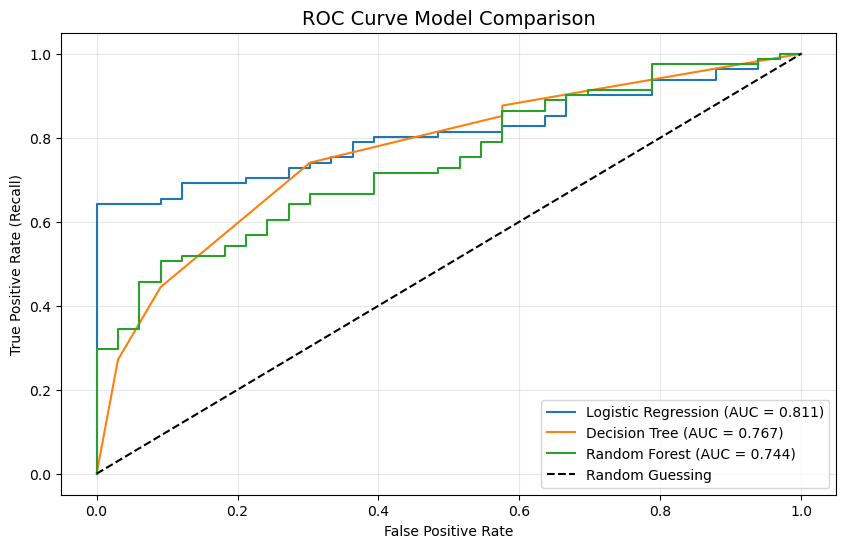

In [74]:
# dictionary for looping
models = {
    'Logistic Regression': best_log_model,
    'Decision Tree': best_tree_model,
    'Random Forest': best_rf_model
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    # get probabilities for class 1
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    
    # calculate ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

#plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('ROC Curve Model Comparison', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

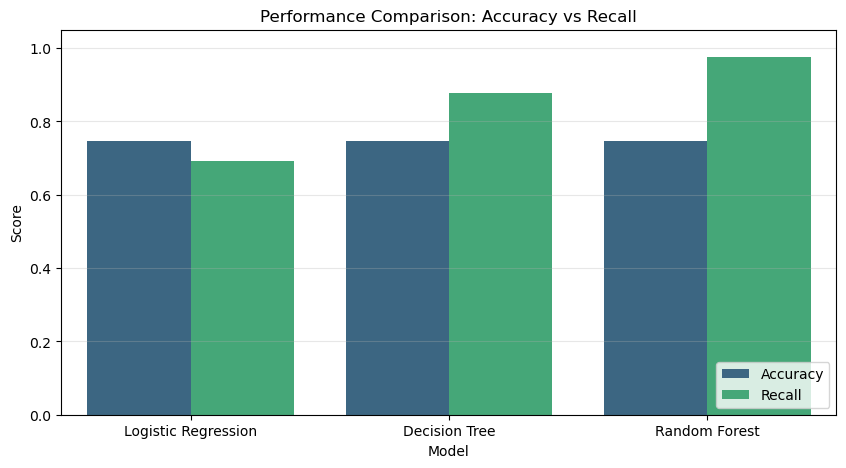

In [61]:
# prepare data for visualization
model_names = []
acc_scores = []
rec_scores = []

# loop through the models dictionary
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    
    model_names.append(name)
    acc_scores.append(accuracy_score(y_test, y_pred))
    rec_scores.append(recall_score(y_test, y_pred))

#creating a DataFrame
perf_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': acc_scores,
    'Recall': rec_scores
})

# reshape for plotting
perf_melted = perf_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=perf_melted, palette='viridis')
plt.title('Performance Comparison: Accuracy vs Recall')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.3)
plt.legend(loc='lower right')
plt.show()

In [73]:
# Initialize
knn_model = KNeighborsClassifier(n_neighbors=5)

# train on scaled data
knn_model.fit(X_train_scaled, y_train)

# predict
y_pred_knn = knn_model.predict(X_test_scaled)

print(" K-Nearest Neighbors ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

 K-Nearest Neighbors 
Accuracy: 0.7368

Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        33
           1       0.77      0.89      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.63      0.64       114
weighted avg       0.72      0.74      0.72       114



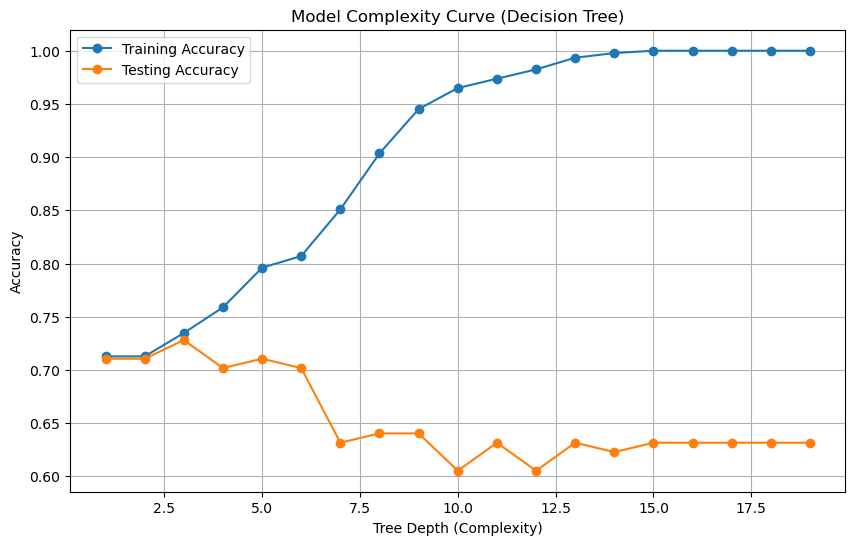

In [67]:
# Arrays to store scores
train_scores = []
test_scores = []

# define a range of tree depths to test
depths = range(1, 20)

for d in depths:
    # initialize tree with current depth
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # record accuracy
    train_scores.append(clf.score(X_train_scaled, y_train))
    test_scores.append(clf.score(X_test_scaled, y_test))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Training Accuracy', marker='o')
plt.plot(depths, test_scores, label='Testing Accuracy', marker='o')
plt.title('Model Complexity Curve (Decision Tree)')
plt.xlabel('Tree Depth (Complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()